# Pymaceuticals Inc.
---

### Analysis

- Observations: 
    - From the summary statistics table for each drug regimen, the placebo had better or similar effects on tumor volume as some of the drug regimens.
    - From the boxplots for the four drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicane worked better at reducing tumor volume than Infubinol and Ceftamin.
    - From the regression analysis, there was a strong, positive correlation between mouse weight and average tumor volume for the Capomulin drug regimen. The larger the weight of the mouse, the larger the average tumor size. 
 

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st


# Study data files
mouse_metadata_path = Path("./Resources/Mouse_metadata.csv")
study_results_path = Path("./Resources/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head(5)
mouse_metadata.head(5)
# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, how= "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mouse_count = len(pd.unique(mouse_results["Mouse ID"]))
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_results[mouse_results.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse = mouse_results[mouse_results["Mouse ID"] == "g989"]
g989_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results[mouse_results["Mouse ID"] != "g989"] 
mouse_results_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(pd.unique(mouse_results_clean["Mouse ID"]))
mouse_count_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_results_clean_summary = pd.DataFrame()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_results_clean_summary["Mean Tumor Value"] = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mouse_results_clean_summary["Median Tumor Value"] = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
mouse_results_clean_summary["Tumor Volume Variance"] = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mouse_results_clean_summary["Tumor Volume Std. Dev."] = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mouse_results_clean_summary["Tumor Volume Std. Err."] = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

mouse_results_clean_summary
 



,Mean Tumor Value,Median Tumor Value,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

mouse_results_clean_summary2 = mouse_results_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean = "mean",
                                                                                                     median = "median",
                                                                                                     variance = "var",
                                                                                                     std = "std",
                                                                                                     sem = "sem")

mouse_results_clean_summary2




,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

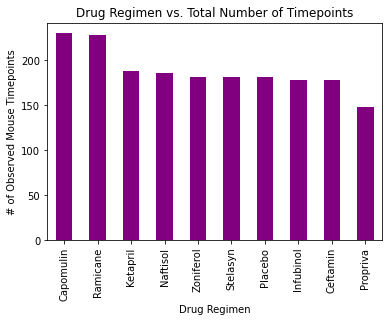

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


mouse_results_drug = mouse_results_clean["Drug Regimen"].value_counts()

mouse_results_drug_bar = mouse_results_drug.plot(kind = "bar", facecolor = "purple", title = "Drug Regimen vs. Total Number of Timepoints", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")




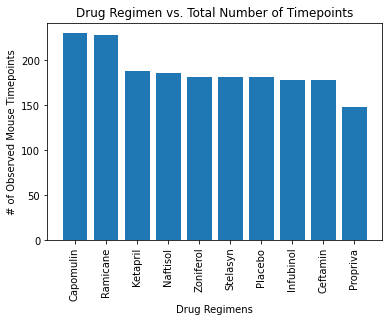

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_results_drug = mouse_results_clean["Drug Regimen"].value_counts()
drug_regimens = mouse_results_drug.index.tolist()
mouse_timepoints = mouse_results_drug.values.tolist()

plt.bar(drug_regimens, mouse_timepoints)
plt.xlabel("Drug Regimens")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Regimen vs. Total Number of Timepoints")
plt.xticks(rotation = 90)

plt.show()

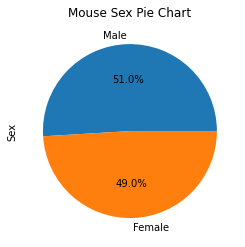

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_results_sex = mouse_results_clean["Sex"].value_counts()
mouse_results_sex
mouse_results_sex_pie = mouse_results_sex.plot(kind = "pie", title = "Mouse Sex Pie Chart", autopct='%1.1f%%' )

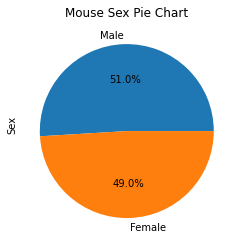

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_results_sex = mouse_results_clean["Sex"].value_counts()
mouse_sex = mouse_results_sex.index.tolist()
mouse_sex_values = mouse_results_sex.values.tolist()

plt.pie(mouse_sex_values, labels = mouse_sex, autopct="%1.1f%%")
plt.title("Mouse Sex Pie Chart")
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.annotate.html
plt.annotate('Sex', xy=(-0.05, 0.5), xycoords='axes fraction', rotation = 90)

plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame(mouse_results_clean.groupby(["Mouse ID"])["Timepoint"].max())
greatest_timepoint_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(greatest_timepoint_df, mouse_results_clean, on = ["Mouse ID", "Timepoint"], how = "inner")
final_tumor_volume
#Filter to find treatment regimens
#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/#
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"].isin(treatment)]
final_tumor_volume_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [76]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Empty dictionary created to store the statistics calculations 
vol_for_treatment_stats = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatment:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    # add subset
    tumor_vol_data.append(tumor_volume)
    # finding each quartile / iqr
    tumor_vol_quartiles = tumor_volume.quantile([.25,.5,.75])
    lower_q = tumor_vol_quartiles[0.25]
    upper_q = tumor_vol_quartiles[0.75]
    iqr = upper_q-lower_q  
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    outliers = tumor_volume[(tumor_volume > upper_bound) | (tumor_volume < lower_bound)]
    #organizing the stats by treatment group
    vol_for_treatment_stats[regimen] = {
        "The lower quartile of final tumor volumes is": lower_q,
        "The upper quartile of final tumor volumes is": upper_q,
        "The interquartile range of final tumor volumes is": iqr,
        "The the median of final tumor volumes is": tumor_vol_quartiles[0.5],
        "The lower bound is": lower_bound,
        "The upper bound is": upper_bound,
        "Outliers": outliers}
    
vol_for_treatment_stats



{'Capomulin': {'The lower quartile of final tumor volumes is': 32.37735684,
  'The upper quartile of final tumor volumes is': 40.1592203,
  'The interquartile range of final tumor volumes is': 7.781863460000004,
  'The the median of final tumor volumes is': 38.1251644,
  'The lower bound is': 20.70456164999999,
  'The upper bound is': 51.83201549,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Ramicane': {'The lower quartile of final tumor volumes is': 31.56046955,
  'The upper quartile of final tumor volumes is': 40.65900627,
  'The interquartile range of final tumor volumes is': 9.098536719999998,
  'The the median of final tumor volumes is': 36.56165229,
  'The lower bound is': 17.912664470000003,
  'The upper bound is': 54.30681135,
  'Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)},
 'Infubinol': {'The lower quartile of final tumor volumes is': 54.04860769,
  'The upper quartile of final tumor volumes is': 65.52574285,
  'The interquartile 

Text(0.5, 1.0, 'Distrubution of the Final Tumor Volume for Each Treatment Group')

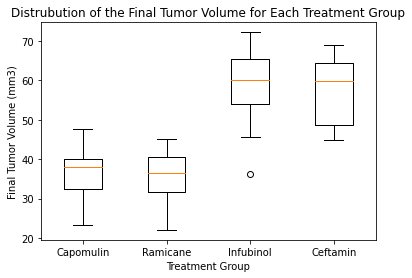

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatment)
plt.xlabel("Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distrubution of the Final Tumor Volume for Each Treatment Group")



## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse y793')

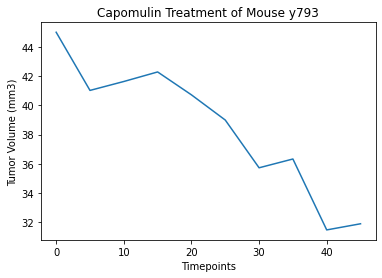

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_volume = mouse_results_clean[mouse_results_clean["Mouse ID"]== "y793"]["Tumor Volume (mm3)"]
capomulin_mouse_timepoints = mouse_results_clean[mouse_results_clean["Mouse ID"]== "y793"]["Timepoint"]
plt.plot(capomulin_mouse_timepoints, capomulin_mouse_volume)
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse y793")

Text(0.5, 1.0, 'Mouse Weight vs. Average Observed Tumor Volume for Capomulin')

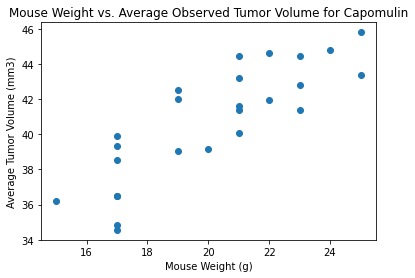

In [107]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_volume = mouse_results_clean[mouse_results_clean["Drug Regimen"]== "Capomulin"][["Mouse ID", "Tumor Volume (mm3)"]]
capomulin_mouse_weight = mouse_results_clean[mouse_results_clean["Drug Regimen"]== "Capomulin"][["Mouse ID","Weight (g)"]]
capomulin_volume_avg = pd.DataFrame(capomulin_volume.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean())
capomulin_mouse_weight_avg = pd.DataFrame(capomulin_mouse_weight.groupby(["Mouse ID"])["Weight (g)"].mean())

plt.scatter(capomulin_mouse_weight_avg, capomulin_volume_avg)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


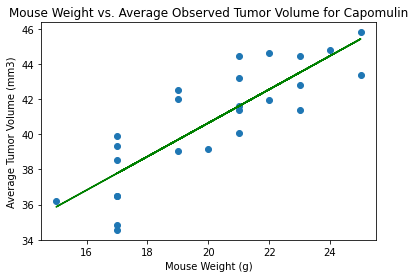

In [146]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_results = pd.merge(capomulin_mouse_weight_avg, capomulin_volume_avg, how= "inner", on = ["Mouse ID"])

from scipy.stats import pearsonr

correlation_coefficient= pearsonr(capomulin_results["Weight (g)"], capomulin_results["Tumor Volume (mm3)"])[0]


from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_results["Weight (g)"], capomulin_results["Tumor Volume (mm3)"])
regress_values = (capomulin_results["Weight (g)"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(capomulin_mouse_weight_avg, capomulin_volume_avg)
plt.plot(capomulin_results["Weight (g)"],regress_values,"g-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin")
print("The correlation between mouse weight and the average tumor volume is " + str(round(correlation_coefficient,2)))

